In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
# Step 1: Load and Preprocess the Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# One-hot encoding of labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [4]:
# Model selection input (MLP or CNN)
print("Choose the classifier:")
print("1. Multilayer Perceptron (MLP)")
print("2. Convolutional Neural Network (CNN)")
choice = input("Enter 1 or 2: ")


Choose the classifier:
1. Multilayer Perceptron (MLP)
2. Convolutional Neural Network (CNN)


Enter 1 or 2:  2


In [5]:
# Build model based on selection
model = Sequential()

if choice == '1':
    print("\nUsing MLP classifier...")
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

elif choice == '2':
    print("\nUsing CNN classifier...")
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
else:
    print("Invalid choice.")
    raise SystemExit



Using CNN classifier...


C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.1, verbose=2)


Epoch 1/10
422/422 - 9s - 22ms/step - accuracy: 0.8966 - loss: 0.3354 - val_accuracy: 0.9807 - val_loss: 0.0671
Epoch 2/10
422/422 - 8s - 18ms/step - accuracy: 0.9691 - loss: 0.1061 - val_accuracy: 0.9840 - val_loss: 0.0561
Epoch 3/10
422/422 - 8s - 19ms/step - accuracy: 0.9765 - loss: 0.0785 - val_accuracy: 0.9887 - val_loss: 0.0395
Epoch 4/10
422/422 - 8s - 18ms/step - accuracy: 0.9814 - loss: 0.0623 - val_accuracy: 0.9905 - val_loss: 0.0341
Epoch 5/10
422/422 - 8s - 19ms/step - accuracy: 0.9842 - loss: 0.0520 - val_accuracy: 0.9917 - val_loss: 0.0314
Epoch 6/10
422/422 - 8s - 18ms/step - accuracy: 0.9860 - loss: 0.0456 - val_accuracy: 0.9918 - val_loss: 0.0330
Epoch 7/10
422/422 - 8s - 19ms/step - accuracy: 0.9886 - loss: 0.0385 - val_accuracy: 0.9918 - val_loss: 0.0311
Epoch 8/10
422/422 - 8s - 18ms/step - accuracy: 0.9885 - loss: 0.0368 - val_accuracy: 0.9918 - val_loss: 0.0316
Epoch 9/10
422/422 - 8s - 19ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9918 - val_loss:

In [7]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\n Test Accuracy: {test_acc * 100:.2f}%")



 Test Accuracy: 99.22%


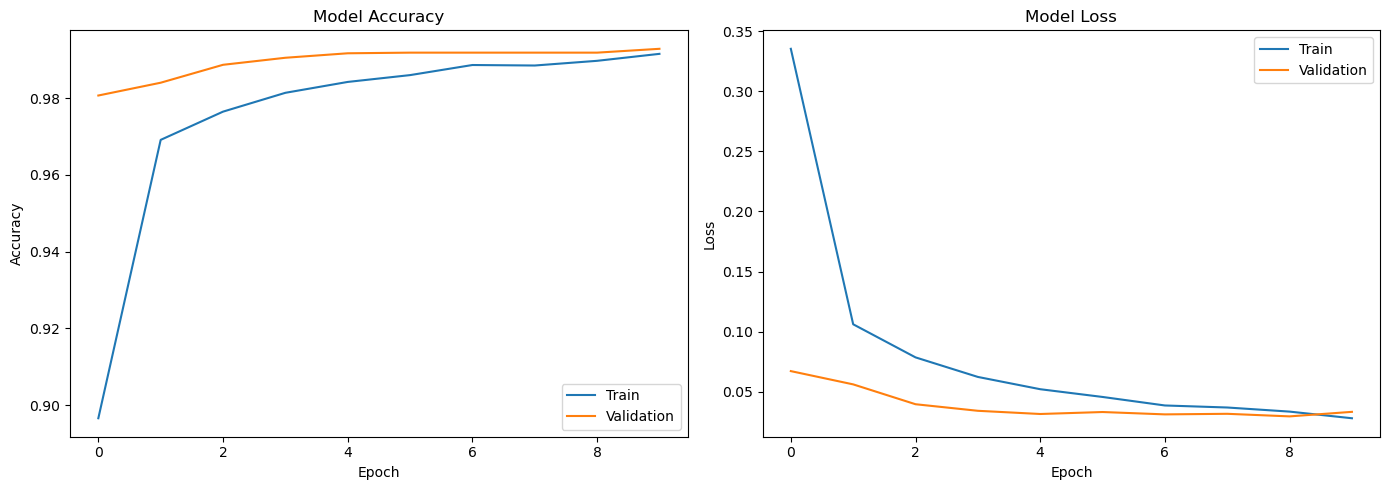

In [8]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


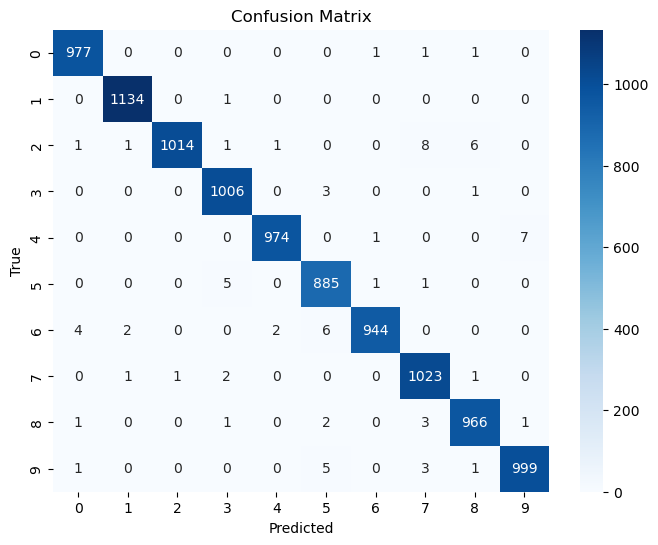

In [11]:
# Predict
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [12]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))



Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



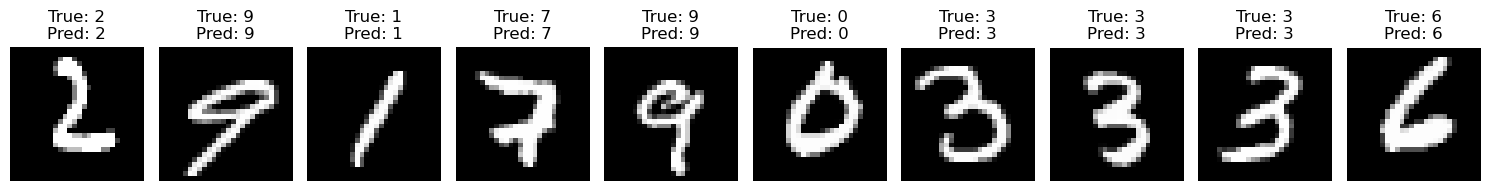

In [13]:
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 4))
for i, idx in enumerate(indices):
    plt.subplot(1, num_samples, i+1)
    image = x_test[idx].reshape(28, 28) if choice == '1' else x_test[idx].squeeze()
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
